In [1]:
# -*- coding: utf-8
# VOLT DATA LAB (https://www.voltdata.info/)
# Reinaldo Chaves (@paidatocandeira)
# Programa que mostra como os deputados estaduais paulistas gastam sua verba de gabinete mensal
#

In [39]:
import json
import xmltodict
import pandas as pd
import numpy as np
import unidecode
import altair as alt

Função para retirar acentuação 

In [65]:
def f(str):
    return (unidecode.unidecode(str))

Formato do float

In [41]:
pd.options.display.float_format = '{:,.2f}'.format

## Estudos sobre a verba de gabinete dos deputados estaduais da atual legislatura

Fonte
https://www.al.sp.gov.br/dados-abertos/recurso/21

Transforma arquivo XML em JSON 

In [42]:
with open("dados/deputados/despesas_gabinetes_set_2018.xml", 'r') as f:
    xmlString = f.read()
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
with open("output.json", 'w') as f:
    f.write(jsonString)

In [43]:
arquivo_json = open('output.json', 'r')

In [44]:
dados_json = json.load(arquivo_json)

Transforma JSON em dataframe

In [45]:
lista = dados_json['despesas']['despesa']

In [46]:
df_despesas = pd.DataFrame(lista, columns = ['Ano', 'CNPJ', 'Deputado', 'Fornecedor', 'Matricula', 'Mes', 'Tipo', 'Valor'])

In [47]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459708 entries, 0 to 459707
Data columns (total 8 columns):
Ano           459708 non-null object
CNPJ          449942 non-null object
Deputado      459708 non-null object
Fornecedor    459708 non-null object
Matricula     459708 non-null object
Mes           459708 non-null object
Tipo          459708 non-null object
Valor         459708 non-null object
dtypes: object(8)
memory usage: 28.1+ MB


Rotinas de limpeza

In [48]:
df_despesas['Valor'] = df_despesas.Valor.astype('float64')

In [49]:
df_despesas['CNPJ'] = df_despesas.CNPJ.astype('str')

In [50]:
def limpeza(linha):
    documento = linha["CNPJ"]
    if len(documento) > 11:
        return documento[:8]
    else:
        return "documento_cpf_"

Pega o CNPJ raiz do fornecedor ou aponta que é um CPF

In [51]:
df_despesas['cnpj_raiz_fornecedor'] = df_despesas.apply(limpeza, axis = 1)

In [52]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459708 entries, 0 to 459707
Data columns (total 9 columns):
Ano                     459708 non-null object
CNPJ                    459708 non-null object
Deputado                459708 non-null object
Fornecedor              459708 non-null object
Matricula               459708 non-null object
Mes                     459708 non-null object
Tipo                    459708 non-null object
Valor                   459708 non-null float64
cnpj_raiz_fornecedor    459708 non-null object
dtypes: float64(1), object(8)
memory usage: 31.6+ MB


In [53]:
df_despesas.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,0,2015,71806251000106,ABELARDO CAMARINHA,AUTO POSTO DE SERVIÇOS MARV LTDA,300257,3,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251
1,1,2015,68064740000125,ABELARDO CAMARINHA,PAPER FACE COMERCIAL LTDA,300257,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740
2,2,2015,22145388877,ABELARDO CAMARINHA,LARA SERVINO VARGAS ABREU,300257,3,N - MORADIA,"2,850.00",documento_cpf_
3,3,2015,10915883000113,ABELARDO CAMARINHA,CENTRO AUTOMOTIVO TOP 23 LTDA,300257,4,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883
4,4,2015,71806251000106,ABELARDO CAMARINHA,AUTO POSTO DE SERVIÇOS MARV LTDA,300257,4,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251


Soma histórico de despesas

In [54]:
df_despesas['Valor'].sum()

315969968.4599999

In [55]:
"${:,.2f}".format(df_despesas.Valor.sum())

'$315,969,968.46'

Soma por deputados o histórico

In [56]:
df_despesas.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Deputado,Valor
41,CAMPOS MACHADO,"4,137,648.91"
10,ALDO DEMARCHI,"3,835,219.48"
183,MARIA LÚCIA AMARY,"3,822,793.66"
5,AFONSO LOBATO,"3,788,564.67"
160,LUIZ CARLOS GONDIM,"3,710,333.35"
72,CÉLIA LEÃO,"3,707,510.74"
234,ROBERTO ENGLER,"3,706,702.16"
100,ENIO TATTO,"3,681,114.40"
20,ANALICE FERNANDES,"3,634,456.04"
17,ANA DO CARMO,"3,477,830.17"


Soma por fornecedor

In [57]:
df_despesas.groupby("Fornecedor").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Fornecedor,Valor
66511,TELEFONICA,"2,937,227.72"
66518,TELEFONICA BRASIL S.A.,"2,532,348.70"
47565,NEXTEL TELECOMUNICAÇÕES LTDA,"2,181,008.51"
66531,TELEFÔNICA BRASIL S.A.,"2,172,174.07"
66516,TELEFONICA BRASIL S.A,"1,637,599.86"
51224,PEDÁGIO,"1,341,831.67"
69430,VIVO S.A.,"1,255,101.17"
47566,NEXTEL TELECOMUNICAÇÕES LTDA.,"1,252,612.73"
66519,TELEFONICA BRASIL S/A,"1,245,003.71"
69421,VIVO,"1,103,428.98"


Tabela dinâmica por ano, deputado e cnpj raiz de fornecedor - caso necessário verificar

In [25]:
#pd.pivot_table(df_despesas,index=["Ano","Deputado", "cnpj_raiz_fornecedor"], values=["Valor"], aggfunc=np.sum)

In [21]:
df_despesas.to_csv('resultados/despesas_dep_est_sp_set.csv', index=False, decimal=',')

# Carrega arquivo salvo

In [4]:
df_despesas = pd.read_csv("resultados/despesas_dep_est_sp_set.csv", sep=',',encoding = 'utf-8', converters={'CNPJ': lambda x: str(x), 'cnpj_raiz_fornecedor': lambda x: str(x), 'Ano': lambda x: str(x)}, decimal=',')

In [58]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459708 entries, 0 to 459707
Data columns (total 9 columns):
Ano                     459708 non-null object
CNPJ                    459708 non-null object
Deputado                459708 non-null object
Fornecedor              459708 non-null object
Matricula               459708 non-null object
Mes                     459708 non-null object
Tipo                    459708 non-null object
Valor                   459708 non-null float64
cnpj_raiz_fornecedor    459708 non-null object
dtypes: float64(1), object(8)
memory usage: 31.6+ MB


Exemplo de procura por nome de fornecedor

In [59]:
mask = df_despesas['Fornecedor'].str.contains("ITORORO", na=False)
procura = df_despesas[mask]

In [60]:
procura.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,41,2015,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,9,A - COMBUSTÍVEIS E LUBRIFICANTES,56.28,61488904
1,42,2015,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,9,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"3,243.72",61488904
2,65,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,3,A - COMBUSTÍVEIS E LUBRIFICANTES,210.00,61488904
3,66,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,3,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"3,148.71",61488904
4,105,2016,61488904000364,ABELARDO CAMARINHA,ITORORO VEÍCULOS E PEÇAS LTDA,300257,8,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,454.56",61488904


Exemplo de procura por CNPJ raiz

In [24]:
nome = df_despesas[(df_despesas['cnpj_raiz_fornecedor'] == '19876022')]

In [25]:
nome.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
0,2642,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,10,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022
1,2645,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,10,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","3,500.00",19876022
2,2653,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,11,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022
3,2656,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,11,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","3,500.00",19876022
4,2665,2015,19876022000148,ADILSON ROSSI,CLEAN WORK EQPT E SERV EIRELI ME,300432,12,K - LOCAÇÃO DE BENS MÓVEIS,"3,800.00",19876022


Exemplo de uma despesa na qual o CNPJ é um CPF de deputado

In [26]:
nome = df_despesas[(df_despesas['CNPJ'] == '02674980800')]
nome

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
376297,2017,02674980800,ROBERTO MASSAFERA,CIRO BERBES JUNIOR,300478,8,N - MORADIA,"2,500.00",documento_cpf_


Separa lote para checar em https://www.al.sp.gov.br/deputados/prestacao-de-contas/

In [27]:
despesa_selecionada = df_despesas[(df_despesas['Deputado'] == 'CAUÊ MACRIS') & 
                              (df_despesas['Ano'] == '2016') & 
                              (df_despesas['Mes'] == '11') & 
                              (df_despesas['Tipo'] == 'K - LOCAÇÃO DE BENS MÓVEIS')]

In [28]:
despesa_selecionada.Valor.sum()

2722.7

In [29]:
"${:,.0f}".format(despesa_selecionada.Valor.sum())

'$2,723'

In [30]:
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
93991,2016,06291703000100,CAUÊ MACRIS,COLORTEC COMÉRCIO LOCAÇÃO E ASSISTÊNCIA TÉCNIC...,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,422.20,06291703
93992,2016,08570955000196,CAUÊ MACRIS,JOSE APARECIDO DE SOUZA INFORMÁTICA,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,"2,150.00",08570955
93993,2016,40432544000147,CAUÊ MACRIS,CLARO S/A,300503,11,K - LOCAÇÃO DE BENS MÓVEIS,150.50,40432544


# Seleciona despesas da atual legislatura

In [61]:
df_despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459708 entries, 0 to 459707
Data columns (total 9 columns):
Ano                     459708 non-null object
CNPJ                    459708 non-null object
Deputado                459708 non-null object
Fornecedor              459708 non-null object
Matricula               459708 non-null object
Mes                     459708 non-null object
Tipo                    459708 non-null object
Valor                   459708 non-null float64
cnpj_raiz_fornecedor    459708 non-null object
dtypes: float64(1), object(8)
memory usage: 31.6+ MB


In [62]:
despesas_atuais = df_despesas[(df_despesas['Ano'] == '2015') | 
                              (df_despesas['Ano'] == '2016') | 
                              (df_despesas['Ano'] == '2017') | 
                              (df_despesas['Ano'] == '2018')].copy()

In [63]:
despesas_atuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87375 entries, 0 to 456964
Data columns (total 9 columns):
Ano                     87375 non-null object
CNPJ                    87375 non-null object
Deputado                87375 non-null object
Fornecedor              87375 non-null object
Matricula               87375 non-null object
Mes                     87375 non-null object
Tipo                    87375 non-null object
Valor                   87375 non-null float64
cnpj_raiz_fornecedor    87375 non-null object
dtypes: float64(1), object(8)
memory usage: 6.7+ MB


In [66]:
despesas_atuais["Deputado"] = despesas_atuais["Deputado"].apply(f)

In [67]:
despesas_atuais.to_excel('resultados/despesas_atuais.xlsx',sheet_name='Sheet1')

Quantidade de deputados com gastos

In [68]:
a = len(despesas_atuais['Deputado'].value_counts())
a

136

Exemplo de deputado da legislatura passada que registrou algumas despesas em 2015

In [69]:
nome = despesas_atuais[(despesas_atuais['Deputado'] == 'BRUNO COVAS')]
nome

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor
66794,2015,02928132000103,BRUNO COVAS,CENTRO DE SERVIÇOS FRANGO ASSADO SULESTE LTDA,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,123.13,02928132
66795,2015,10318092000106,BRUNO COVAS,AUTO POSTO DUQUE SUECIA LTDA.,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,115.07,10318092
66796,2015,10559732000170,BRUNO COVAS,AUTO POSTO NAUTICA FREI GASPAR LTDA-ME,300481,1,A - COMBUSTÍVEIS E LUBRIFICANTES,128.17,10559732
66797,2015,43283811001474,BRUNO COVAS,KALUNGA COMERCIO INDUSTRIA GRAFICA LTDA,300481,1,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,48.20,43283811
66798,2015,40432544000147,BRUNO COVAS,CLARO CLUBE,300481,1,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...",735.32,40432544
66799,2015,02575829000148,BRUNO COVAS,AVIANCA,300481,1,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...","1,660.00",02575829
66800,2015,nan,BRUNO COVAS,TAXI,300481,1,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",220.00,documento_cpf_
66801,2015,05742944000158,BRUNO COVAS,MIRAGE EMPREENDIMENTOS E PARTICIPAÇÕES LTDA,300481,1,N - MORADIA,"2,850.00",05742944


## Separa nomes de deputados que têm gastos na atual legislatura para criar um dataframe base de nomes que será finalizado em alesp_unificacodigos

In [40]:
nomes = despesas_atuais['Deputado'].value_counts()

nomes_deputados_atual_legislatura = pd.DataFrame({'Deputado':nomes.index, 'list':nomes.values})

nomes_deputados_atual_legislatura = nomes_deputados_atual_legislatura.drop('list', axis=1)

nomes_deputados_atual_legislatura.info()

nomes_deputados_atual_legislatura.to_csv("resultados/nomes_deputados_atual_legislatura.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
Deputado    136 non-null object
dtypes: object(1)
memory usage: 1.1+ KB


### Carrega nomes de deputados da atual legislatura - gerados no alesp_unificacodigos

In [70]:
nomes_deputados_atual_legislatura = pd.read_csv('resultados/deputados_selecionados_final.csv', converters={'sequencial': lambda x: str(x), 'cpf': lambda x: str(x), 'codigo_unico': lambda x: str(x) })

In [71]:
nomes_deputados_atual_legislatura["nome_deputado"] = nomes_deputados_atual_legislatura["nome_deputado"].apply(f)

In [72]:
nomes_deputados_atual_legislatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
codigo_unico       120 non-null object
nome_deputado      120 non-null object
uf                 120 non-null object
nome_completo      120 non-null object
sequencial         120 non-null object
cpf                120 non-null object
nome_urna          120 non-null object
partido_eleicao    120 non-null object
situacao           120 non-null object
dtypes: object(9)
memory usage: 8.5+ KB


In [73]:
a = len(nomes_deputados_atual_legislatura['nome_deputado'].value_counts())
a

120

Filtra por esses nomes

In [74]:
despesas_atuais_final = pd.merge(despesas_atuais, nomes_deputados_atual_legislatura, left_on='Deputado', right_on='nome_urna')

In [75]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86870 entries, 0 to 86869
Data columns (total 18 columns):
Ano                     86870 non-null object
CNPJ                    86870 non-null object
Deputado                86870 non-null object
Fornecedor              86870 non-null object
Matricula               86870 non-null object
Mes                     86870 non-null object
Tipo                    86870 non-null object
Valor                   86870 non-null float64
cnpj_raiz_fornecedor    86870 non-null object
codigo_unico            86870 non-null object
nome_deputado           86870 non-null object
uf                      86870 non-null object
nome_completo           86870 non-null object
sequencial              86870 non-null object
cpf                     86870 non-null object
nome_urna               86870 non-null object
partido_eleicao         86870 non-null object
situacao                86870 non-null object
dtypes: float64(1), object(17)
memory usage: 12.6+ MB


In [76]:
a = len(despesas_atuais_final['Deputado'].value_counts())
a

120

In [77]:
despesas_atuais_final.to_csv('resultados/despesas_atuais_final.csv', index=False, decimal=',')

In [78]:
despesas_atuais_final.to_excel('resultados/despesas_atuais_final.xlsx',sheet_name='Sheet1', index=False)

In [79]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86870 entries, 0 to 86869
Data columns (total 18 columns):
Ano                     86870 non-null object
CNPJ                    86870 non-null object
Deputado                86870 non-null object
Fornecedor              86870 non-null object
Matricula               86870 non-null object
Mes                     86870 non-null object
Tipo                    86870 non-null object
Valor                   86870 non-null float64
cnpj_raiz_fornecedor    86870 non-null object
codigo_unico            86870 non-null object
nome_deputado           86870 non-null object
uf                      86870 non-null object
nome_completo           86870 non-null object
sequencial              86870 non-null object
cpf                     86870 non-null object
nome_urna               86870 non-null object
partido_eleicao         86870 non-null object
situacao                86870 non-null object
dtypes: float64(1), object(17)
memory usage: 12.6+ MB


In [39]:
despesas_atuais_final = pd.read_csv('resultados/despesas_atuais_final.csv', converters={'CNPJ': lambda x: str(x), 
                                                                                        'cnpj_raiz_fornecedor': lambda x: str(x), 
                                                                                        'codigo_unico': lambda x: str(x), 
                                                                                        'sequencial': lambda x: str(x), 
                                                                                        'Ano': lambda x: str(x), 
                                                                                        'Mes': lambda x: str(x), 
                                                                                        'cpf': lambda x: str(x) })

Checa alguns nomes

In [51]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'ADILSON ROSSI') & 
                              (despesas_atuais_final['Ano'] == '2015') & 
                              (despesas_atuais_final['Mes'] == 10) & 
                              (despesas_atuais_final['Tipo'] == 'K - LOCAÇÃO DE BENS MÓVEIS')]

In [52]:
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao


In [53]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'GIL LANCASTER') & 
                              (despesas_atuais_final['Ano'] == '2018') & 
                              (despesas_atuais_final['Mes'] == '3') & 
                              (despesas_atuais_final['Tipo'] == 'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO')]
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
37543,2018,07686203000122,GIL LANCASTER,CRIDON COMERCIAL LTDA EPP,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,32.00,07686203,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37544,2018,15359521000107,GIL LANCASTER,O MUNDO DAS EMBALAGENS LTDA - EPP,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,147.20,15359521,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37545,2018,24422336000100,GIL LANCASTER,EDINAURA BATISTA FIGUEIREDO SILVA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,80.16,24422336,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37546,2018,33014556035577,GIL LANCASTER,LOJAS AMERICANAS S/A,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,59.97,33014556,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37547,2018,43283811002608,GIL LANCASTER,KALUNGA COMERCIO E IND. GRÁFICA LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,375.35,43283811,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37548,2018,43283811004066,GIL LANCASTER,KALUNGA COMERCIO E IND.GRAFICA LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,126.60,43283811,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP
37549,2018,60437647001936,GIL LANCASTER,SILVA E BARBOSA COMERCIO DE ALIMENTOS LTDA,300585,3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,247.28,60437647,13083,GIL LANCASTER,SP,GIL LANCASTER FRAZÃO DE MORAES,250000001651,04383835830,GIL LANCASTER,DEM,ELEITO POR QP


In [54]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'FERNANDO CAPEZ') & 
                              (despesas_atuais_final['Ano'] == '2016') & 
                              (despesas_atuais_final['Mes'] == '2') & 
                              (despesas_atuais_final['Tipo'] == 'J - SERVIÇOS DE COMUNICAÇÃO')]
despesa_selecionada

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
34566,2016,67641886000123,FERNANDO CAPEZ,ECT - EMP. BRAS. CORREIOS E TELEGRAFOS,300459,2,J - SERVIÇOS DE COMUNICAÇÃO,2.10,67641886,10600,FERNANDO CAPEZ,SP,FERNANDO CAPEZ,250000001510,08238377854,FERNANDO CAPEZ,PSDB,ELEITO POR QP


Verifica se algum nome não foi encontrado

In [55]:
nomes_naoencontrados = pd.merge(despesas_atuais, 
                        nomes_deputados_atual_legislatura, 
                        left_on='Deputado', 
                        right_on='nome_urna',
                        how='outer',
                        indicator=True)

rdf = nomes_naoencontrados.query("_merge == 'right_only'").drop('_merge',axis=1)

In [56]:
rdf.nome_urna

Series([], Name: nome_urna, dtype: object)

Quantidade geral de despesas

In [57]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86870 entries, 0 to 86869
Data columns (total 18 columns):
Ano                     86870 non-null object
CNPJ                    86870 non-null object
Deputado                86870 non-null object
Fornecedor              86870 non-null object
Matricula               86870 non-null object
Mes                     86870 non-null object
Tipo                    86870 non-null object
Valor                   86870 non-null float64
cnpj_raiz_fornecedor    86870 non-null object
codigo_unico            86870 non-null object
nome_deputado           86870 non-null object
uf                      86870 non-null object
nome_completo           86870 non-null object
sequencial              86870 non-null object
cpf                     86870 non-null object
nome_urna               86870 non-null object
partido_eleicao         86870 non-null object
situacao                86870 non-null object
dtypes: float64(1), object(17)
memory usage: 12.6+ MB


Quantidade deputados

In [58]:
a = len(despesas_atuais_final['Deputado'].value_counts())
a

120

Nomes de deputados que tiveram despesas de gabinete na atual legislatura, em quantidade

In [59]:
despesas_atuais_final['Deputado'].value_counts()

MARCIA LIA               2917
WELSON GASPARINI         2665
REINALDO ALGUZ           2340
SEBASTIAO SANTOS         2065
JOOJI HATO               1994
ANDRE SOARES             1994
DAVI ZAIA                1823
LUIZ CARLOS GONDIM       1773
MARIA LUCIA AMARY        1754
RITA PASSOS              1742
CARLOS NEDER             1679
PEDRO TOBIAS             1642
EDSON GIRIBONI           1560
BARROS MUNHOZ            1467
RODRIGO MORAES           1458
HELIO NISHIMOTO          1410
CAUE MACRIS              1382
FERNANDO CURY            1334
LUIZ FERNANDO            1303
CORONEL TELHADA          1271
RAFAEL SILVA             1245
ANDRE DO PRADO           1215
CHICO SARDELLI           1206
CELSO NASCIMENTO         1189
CLELIA GOMES             1150
ROQUE BARBIERE           1147
FELICIANO FILHO          1088
RICARDO MADALENA         1078
ANALICE FERNANDES        1062
ROBERTO TRIPOLI          1029
                         ... 
JOSE ZICO PRADO           255
GILMAR GIMENES            254
ATILA JACO

# Análises das despesas da atual legislatura

Soma das despesas

In [60]:
despesas_atuais_final['Valor'].sum()

80674665.28999999

In [61]:
"${:,.2f}".format(despesas_atuais_final.Valor.sum())

'$80,674,665.29'

Média

In [62]:
despesas_atuais_final['Valor'].mean()

928.682690111661

In [63]:
"${:,.0f}".format(despesas_atuais_final.Valor.mean())

'$929'

Mediana

In [64]:
despesas_atuais_final['Valor'].median()

210.0

In [65]:
"${:,.0f}".format(despesas_atuais_final.Valor.median())

'$210'

Maiores despesas

In [66]:
despesas_atuais_final.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
60,ITAMAR BORGES,"1,285,715.63"
21,CARLAO PIGNATARI,"1,269,712.39"
20,CAMPOS MACHADO,"1,226,689.83"
5,ALENCAR SANTANA BRAGA,"1,207,405.41"
104,ROBERTO MASSAFERA,"1,187,309.60"
100,REINALDO ALGUZ,"1,179,862.39"
113,TEONILIO BARBA,"1,176,615.03"
37,DAVI ZAIA,"1,175,287.97"
47,FELICIANO FILHO,"1,175,027.87"
86,MARTA COSTA,"1,171,504.37"


In [67]:
gasto_geral = despesas_atuais_final.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False)
gasto_geral.to_excel('resultados/gasto_geraldeputados.xlsx',sheet_name='Sheet1')

Porcentagens

In [68]:
# Agrupamento dos gastos por categoria
nomes_dep = despesas_atuais_final.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
nomes_dep['porcentagem'] = (nomes_dep['Valor'] / nomes_dep['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
nomes_dep['Valor'] = nomes_dep['Valor'].map('{:,.2f}'.format)
nomes_dep['porcentagem'] = nomes_dep['porcentagem'].map('{:,.2f}'.format)

# Resultado
nomes_dep.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,ITAMAR BORGES,"1,285,715.63",1.59
1,1,CARLAO PIGNATARI,"1,269,712.39",1.57
2,2,CAMPOS MACHADO,"1,226,689.83",1.52
3,3,ALENCAR SANTANA BRAGA,"1,207,405.41",1.50
4,4,ROBERTO MASSAFERA,"1,187,309.60",1.47
5,5,REINALDO ALGUZ,"1,179,862.39",1.46
6,6,TEONILIO BARBA,"1,176,615.03",1.46
7,7,DAVI ZAIA,"1,175,287.97",1.46
8,8,FELICIANO FILHO,"1,175,027.87",1.46
9,9,MARTA COSTA,"1,171,504.37",1.45


In [69]:
nomes_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
Deputado       120 non-null object
Valor          120 non-null object
porcentagem    120 non-null object
dtypes: object(3)
memory usage: 2.9+ KB


In [70]:
nomes_dep['porcentagem'] = nomes_dep.porcentagem.astype('float64')

In [71]:
nomes_dep.head()

,Deputado,Valor,porcentagem
0,ITAMAR BORGES,"1,285,715.63",1.59
1,CARLAO PIGNATARI,"1,269,712.39",1.57
2,CAMPOS MACHADO,"1,226,689.83",1.52
3,ALENCAR SANTANA BRAGA,"1,207,405.41",1.50
4,ROBERTO MASSAFERA,"1,187,309.60",1.47


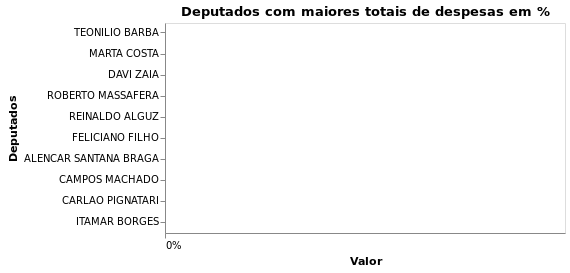

In [118]:
alt.Chart(nomes_dep.reset_index().head(10), title="Deputados com maiores totais de despesas em %").mark_bar().encode(
    x=alt.X("Valor:Q", axis=alt.Axis(title="Valor", format='.0%')),
    y=alt.Y(
        "Deputado:N",
        sort=alt.SortField(field="Valor", op="sum", order="descending"),
        axis=alt.Axis(title="Deputados")
    )
)

Maior despesa individual

In [72]:
despesas_atuais_final[despesas_atuais_final['Valor']== despesas_atuais_final['Valor'].max()]

,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
82298,2018,10778146820,TEONILIO BARBA,MARCELO PEREIRA NUNES,300584,7,L - LOCAÇÃO DE BENS IMÓVEIS,"9,511.21",documento_cpf_,13109,TEONILIO BARBA,SP,TEONILIO MONTEIRO DA COSTA,250000000595,02884327894,TEONILIO BARBA,PT,ELEITO POR QP


Média por ano 

In [73]:
despesas_atuais_final.groupby('Ano').mean()['Valor']

Ano
2015   894.44
2016   946.35
2017   943.16
2018   928.04
Name: Valor, dtype: float64

Verifica nomes

In [74]:
despesa_selecionada = despesas_atuais_final[(despesas_atuais_final['Deputado'] == 'CARLOS GIANNAZI')]

In [75]:
despesa_selecionada.groupby("Tipo").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Tipo,Valor
2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","190,803.54"
8,L - LOCAÇÃO DE BENS IMÓVEIS,"122,148.33"
5,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","99,586.14"
1,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"38,260.09"
3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"7,880.98"
6,J - SERVIÇOS DE COMUNICAÇÃO,"7,410.94"
0,A - COMBUSTÍVEIS E LUBRIFICANTES,"5,159.09"
7,K - LOCAÇÃO DE BENS MÓVEIS,648.18
4,"G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES E I...",643.36


Quantidade de tipos de despesas

In [76]:
despesas_atuais_final['Tipo'].nunique()

13

Quantidade de despesas por Tipo

In [77]:
despesas_atuais_final['Tipo'].value_counts()

A - COMBUSTÍVEIS E LUBRIFICANTES                                      22953
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                   12981
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)      10764
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              9074
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          6820
G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES E INTERNET                  5153
L - LOCAÇÃO DE BENS IMÓVEIS                                            4469
K - LOCAÇÃO DE BENS MÓVEIS                                             3852
C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS     3281
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     3021
J - SERVIÇOS DE COMUNICAÇÃO                                            2212
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       1529
N - MORADIA                                                             761
Name: Tipo, 

Gastos por tipo de despesa

In [78]:
despesas_atuais_final.groupby("Tipo").Valor.sum().reset_index().sort_values("Valor", ascending=False)

,Tipo,Valor
2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","16,491,948.53"
10,L - LOCAÇÃO DE BENS IMÓVEIS,"15,412,332.12"
0,A - COMBUSTÍVEIS E LUBRIFICANTES,"7,348,927.66"
6,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","6,888,704.86"
11,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","6,071,216.62"
4,F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTOR...,"5,967,872.30"
9,K - LOCAÇÃO DE BENS MÓVEIS,"5,130,053.65"
3,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"4,963,460.51"
8,J - SERVIÇOS DE COMUNICAÇÃO,"4,042,217.03"
1,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,961,370.39"


Porcentagens por tipo de despesa

In [79]:
# Agrupamento dos gastos por categoria
df_tipo = despesas_atuais_final.groupby(['Tipo']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
df_tipo['porcentagem'] = (df_tipo['Valor'] / df_tipo['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
df_tipo['Valor'] = df_tipo['Valor'].map('{:,.2f}'.format)
df_tipo['porcentagem'] = df_tipo['porcentagem'].map('{:,.2f}'.format)

# Resultado
df_tipo.reset_index() 

,index,Tipo,Valor,porcentagem
0,0,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","16,491,948.53",20.44
1,1,L - LOCAÇÃO DE BENS IMÓVEIS,"15,412,332.12",19.10
2,2,A - COMBUSTÍVEIS E LUBRIFICANTES,"7,348,927.66",9.11
3,3,"H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERG...","6,888,704.86",8.54
4,4,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...","6,071,216.62",7.53
5,5,F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTOR...,"5,967,872.30",7.40
6,6,K - LOCAÇÃO DE BENS MÓVEIS,"5,130,053.65",6.36
7,7,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,"4,963,460.51",6.15
8,8,J - SERVIÇOS DE COMUNICAÇÃO,"4,042,217.03",5.01
9,9,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,"2,961,370.39",3.67


Mais gastos em quatidade em tipo D por deputado

In [80]:
despesas_atuais_final[despesas_atuais_final['Tipo']=='D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS']['Deputado'].value_counts().head(10)

CARLAO PIGNATARI         71
WELSON GASPARINI         66
ROBERTO ENGLER           61
GIL LANCASTER            58
ALENCAR SANTANA BRAGA    58
MILTON VIEIRA            56
CARLOS NEDER             54
ANALICE FERNANDES        52
EDSON GIRIBONI           52
ROBERTO MORAIS           50
Name: Deputado, dtype: int64

Maiores gastos em valor em tipo D por deputado

In [81]:
graficas = despesas_atuais_final[(despesas_atuais_final['Tipo'] == 'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS')]

In [82]:
graficas.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
8,ANA DO CARMO,"343,000.00"
100,ROBERTO ENGLER,"335,533.00"
17,BETH SAHAO,"335,350.00"
108,SEBASTIAO SANTOS,"330,271.52"
68,LECI BRANDAO,"323,877.00"
105,ROGERIO NOGUEIRA,"320,000.00"
86,MILTON VIEIRA,"319,606.75"
101,ROBERTO MASSAFERA,"318,400.00"
44,ENIO TATTO,"318,320.00"
95,RAMALHO DA CONSTRUCAO,"316,870.00"


Porcentagens por tipo de despesa de gráficas 

In [83]:
# Agrupamento dos gastos por nomes
nomes_graficas = graficas.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
nomes_graficas['porcentagem'] = (nomes_graficas['Valor'] / nomes_graficas['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
nomes_graficas['Valor'] = nomes_graficas['Valor'].map('{:,.2f}'.format)
nomes_graficas['porcentagem'] = nomes_graficas['porcentagem'].map('{:,.2f}'.format)

# Resultado
nomes_graficas.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,ANA DO CARMO,"343,000.00",2.08
1,1,ROBERTO ENGLER,"335,533.00",2.03
2,2,BETH SAHAO,"335,350.00",2.03
3,3,SEBASTIAO SANTOS,"330,271.52",2.00
4,4,LECI BRANDAO,"323,877.00",1.96
5,5,ROGERIO NOGUEIRA,"320,000.00",1.94
6,6,MILTON VIEIRA,"319,606.75",1.94
7,7,ROBERTO MASSAFERA,"318,400.00",1.93
8,8,ENIO TATTO,"318,320.00",1.93
9,9,RAMALHO DA CONSTRUCAO,"316,870.00",1.92


Graficas usadas por ANA do CARMO

In [84]:
ana_grafica = graficas[(graficas['Deputado'] == 'ANA DO CARMO')]

In [85]:
ana_grafica.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
0,3180,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,1,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
1,3183,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,2,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
2,3188,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,3,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
3,3191,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,4,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP
4,3197,2015,08026465000123,ANA DO CARMO,AGB PACK,300400,5,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...","8,000.00",08026465,418,ANA DO CARMO,SP,ANA MARIA DO CARMO ROSSETO,250000000510,08000475839,ANA DO CARMO,PT,ELEITO POR QP


AGB PACK COMERCIO DE EMBALAGENS E SERVICOS
VIVIANE DE CASSIA FERREIRA 
R VISCONDE DE PARNAIBA S/N - SAO PAULO - SP

ANNA GIULIA CARMO BUSCATTI
EPP
R MADRE DE DEUS 1285 APT 101 - SAO PAULO - SP

Mais gastos em quatidade em tipo L por deputado

In [86]:
despesas_atuais_final[despesas_atuais_final['Tipo']=='L - LOCAÇÃO DE BENS IMÓVEIS']['Deputado'].value_counts().head(10)

CAMPOS MACHADO           191
ROBERTO MASSAFERA        129
FERNANDO CURY            122
WELLINGTON MOURA         109
MARTA COSTA              107
ALENCAR SANTANA BRAGA     99
BARROS MUNHOZ             99
ENIO TATTO                92
EDSON GIRIBONI            90
GILENO GOMES              90
Name: Deputado, dtype: int64

Maiores gastos em valor em tipo L por deputado

In [87]:
locacao_imoveis = despesas_atuais_final[(despesas_atuais_final['Tipo'] == 'L - LOCAÇÃO DE BENS IMÓVEIS')] 

In [88]:
locacao_imoveis.groupby("Deputado").Valor.sum().reset_index().sort_values("Valor", ascending=False).head(10)

,Deputado,Valor
17,CAMPOS MACHADO,"721,700.44"
25,CELINO CARDOSO,"444,893.87"
98,WELLINGTON MOURA,"402,106.70"
2,ALDO DEMARCHI,"368,114.15"
6,ANA DO CARMO,"349,139.24"
42,FERNANDO CAPEZ,"341,797.42"
3,ALENCAR SANTANA BRAGA,"325,966.44"
43,FERNANDO CURY,"324,000.00"
9,ANDRE SOARES,"314,545.14"
95,TEONILIO BARBA,"310,551.12"


Porcentagens

In [89]:
# Agrupamento dos gastos por nomes
imoveis = locacao_imoveis.groupby(['Deputado']).agg({'Valor': sum})\
                                .sort_values('Valor', ascending = False)\
                                .reset_index()

# Cálculo de porcentagem de cada categoria no total de gastos
imoveis['porcentagem'] = (imoveis['Valor'] / imoveis['Valor'].sum()) * 100

# Formatação de números para duas casas decimais
imoveis['Valor'] = imoveis['Valor'].map('{:,.2f}'.format)
imoveis['porcentagem'] = imoveis['porcentagem'].map('{:,.2f}'.format)

# Resultado
imoveis.reset_index().head(10)

,index,Deputado,Valor,porcentagem
0,0,CAMPOS MACHADO,"721,700.44",4.68
1,1,CELINO CARDOSO,"444,893.87",2.89
2,2,WELLINGTON MOURA,"402,106.70",2.61
3,3,ALDO DEMARCHI,"368,114.15",2.39
4,4,ANA DO CARMO,"349,139.24",2.27
5,5,FERNANDO CAPEZ,"341,797.42",2.22
6,6,ALENCAR SANTANA BRAGA,"325,966.44",2.11
7,7,FERNANDO CURY,"324,000.00",2.10
8,8,ANDRE SOARES,"314,545.14",2.04
9,9,TEONILIO BARBA,"310,551.12",2.01


Imoveis usados por CAMPOS MACHADO

In [90]:
imoveis_campos = locacao_imoveis[(locacao_imoveis['Deputado'] == 'CAMPOS MACHADO')]

In [91]:
imoveis_campos.reset_index().head()

,index,Ano,CNPJ,Deputado,Fornecedor,Matricula,Mes,Tipo,Valor,cnpj_raiz_fornecedor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao
0,11435,2015,07813996000101,CAMPOS MACHADO,CMV AUTOMAÇÃO S/A,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"6,800.00",07813996,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
1,11436,2015,13033477844,CAMPOS MACHADO,CLAUDIA SALLUM YAZBEK,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"1,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
2,11437,2015,15195476845,CAMPOS MACHADO,IVETE ABBUD DIB,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"3,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
3,11438,2015,15306494803,CAMPOS MACHADO,CLARICE ABBUD GABRIEL,300217,1,L - LOCAÇÃO DE BENS IMÓVEIS,"3,400.00",documento_cpf_,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP
4,11446,2015,07813996000101,CAMPOS MACHADO,CMV AUTOMAÇÃO S/A,300217,2,L - LOCAÇÃO DE BENS IMÓVEIS,"6,800.00",07813996,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP


+ CMV AUTOMACAO S/A.
R CONSELHEIRO ZACARIAS, 201
VICTOR NACIM ABBUD 
GUILNAR ATALLAH ABBUD

+ CLAUDIA SALLUM YAZBEK

+ IVETE ABBUD DIB

+ CLARICE ABBUD GABRIEL

+ NORMA ABBUD SALLUM

Pega CPF de deputados e cruza com despesas - para saber se há fornecedores com CPF de deputados

In [92]:
nomes_deputados_atual_legislatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
codigo_unico       120 non-null object
nome_deputado      120 non-null object
uf                 120 non-null object
nome_completo      120 non-null object
sequencial         120 non-null object
cpf                120 non-null object
nome_urna          120 non-null object
partido_eleicao    120 non-null object
situacao           120 non-null object
dtypes: object(9)
memory usage: 8.5+ KB


In [93]:
despesas_deputados_cpf = pd.merge(nomes_deputados_atual_legislatura, despesas_atuais_final, left_on='cpf', right_on='CNPJ')

In [94]:
despesas_deputados_cpf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 27 columns):
codigo_unico_x          7 non-null object
nome_deputado_x         7 non-null object
uf_x                    7 non-null object
nome_completo_x         7 non-null object
sequencial_x            7 non-null object
cpf_x                   7 non-null object
nome_urna_x             7 non-null object
partido_eleicao_x       7 non-null object
situacao_x              7 non-null object
Ano                     7 non-null object
CNPJ                    7 non-null object
Deputado                7 non-null object
Fornecedor              7 non-null object
Matricula               7 non-null object
Mes                     7 non-null object
Tipo                    7 non-null object
Valor                   7 non-null float64
cnpj_raiz_fornecedor    7 non-null object
codigo_unico_y          7 non-null object
nome_deputado_y         7 non-null object
uf_y                    7 non-null object
nome_completo_y 

In [95]:
despesas_deputados_cpf[['nome_urna_x','cpf_x','Fornecedor','Mes', 'Ano', 'Valor']]

,nome_urna_x,cpf_x,Fornecedor,Mes,Ano,Valor
0,ROBERTO MASSAFERA,02674980800,CIRO BERBES JUNIOR,8,2017,"2,500.00"
1,DOUTOR ULYSSES,01788949820,ULYSSES MARIO TASSINARI,10,2017,"3,656.91"
2,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,4,2015,"5,800.00"
3,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,7,2015,"5,800.00"
4,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,7,2015,46.45
5,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,1,2016,"5,800.00"
6,IGOR SOARES,28223302802,MARIA ELISA INTERNODATO NUNES VIEIRA,1,2016,46.45


In [96]:
pd.pivot_table(despesas_atuais_final,index=["Deputado"], values=["Valor"], aggfunc=np.sum)

,Valor
Deputado,
ABELARDO CAMARINHA,"1,004,247.44"
ADILSON ROSSI,"908,521.02"
AFONSO LOBATO,"1,119,840.57"
AIRTON GARCIA,"45,055.20"
ALDO DEMARCHI,"959,938.81"
ALENCAR SANTANA BRAGA,"1,207,405.41"
ALEXANDRE DA FARMACIA,"64,330.55"
ALEXANDRE PEREIRA,"87,212.92"
ANA DO CARMO,"957,704.72"


In [97]:
despesas_atuais_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86870 entries, 0 to 86869
Data columns (total 18 columns):
Ano                     86870 non-null object
CNPJ                    86870 non-null object
Deputado                86870 non-null object
Fornecedor              86870 non-null object
Matricula               86870 non-null object
Mes                     86870 non-null object
Tipo                    86870 non-null object
Valor                   86870 non-null float64
cnpj_raiz_fornecedor    86870 non-null object
codigo_unico            86870 non-null object
nome_deputado           86870 non-null object
uf                      86870 non-null object
nome_completo           86870 non-null object
sequencial              86870 non-null object
cpf                     86870 non-null object
nome_urna               86870 non-null object
partido_eleicao         86870 non-null object
situacao                86870 non-null object
dtypes: float64(1), object(17)
memory usage: 12.6+ MB


In [98]:
gasto_mensal = pd.pivot_table(despesas_atuais_final,index=["nome_deputado","Ano", "Mes"], values=["Valor"], aggfunc=np.sum).reset_index()

In [99]:
gasto_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 4 columns):
nome_deputado    4060 non-null object
Ano              4060 non-null object
Mes              4060 non-null object
Valor            4060 non-null float64
dtypes: float64(1), object(3)
memory usage: 127.0+ KB


In [100]:
gasto_mensal.head(10)

,nome_deputado,Ano,Mes,Valor
0,ABELARDO CAMARINHA,2015,10,"24,117.43"
1,ABELARDO CAMARINHA,2015,11,"20,984.07"
2,ABELARDO CAMARINHA,2015,3,"3,345.40"
3,ABELARDO CAMARINHA,2015,4,"4,843.97"
4,ABELARDO CAMARINHA,2015,5,"15,738.48"
5,ABELARDO CAMARINHA,2015,6,"18,245.08"
6,ABELARDO CAMARINHA,2015,7,"23,953.70"
7,ABELARDO CAMARINHA,2015,8,"27,587.43"
8,ABELARDO CAMARINHA,2015,9,"27,058.59"
9,ABELARDO CAMARINHA,2016,10,"27,676.30"


# Verifica deputados com gastos acima do teto mensal (R$ 31337.50) em 2018

In [101]:
acima_teto = gasto_mensal[(gasto_mensal['Ano'] == '2018') & 
                          (gasto_mensal['Valor'] > 31337.50)]

In [102]:
acima_teto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 32 to 3899
Data columns (total 4 columns):
nome_deputado    76 non-null object
Ano              76 non-null object
Mes              76 non-null object
Valor            76 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.0+ KB


In [103]:
a = len(acima_teto['nome_deputado'].value_counts())
a

28

In [104]:
acima_teto

,nome_deputado,Ano,Mes,Valor
32,ABELARDO CAMARINHA,2018,1,"31,945.00"
33,ABELARDO CAMARINHA,2018,2,"31,945.00"
34,ABELARDO CAMARINHA,2018,3,"31,945.00"
35,ABELARDO CAMARINHA,2018,4,"31,845.00"
37,ABELARDO CAMARINHA,2018,6,"31,945.00"
80,ADILSON ROSSI,2018,6,"32,588.54"
121,AFONSO LOBATO,2018,4,"35,038.44"
562,BETH SAHAO,2018,2,"33,580.63"
563,BETH SAHAO,2018,3,"35,148.65"
565,BETH SAHAO,2018,5,"32,338.45"
